In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
banks = pd.read_csv('~/Desktop/Thinkful-Projects/banks.csv')
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 12 columns):
Financial Institution Number    2883 non-null float64
Institution Name                3484 non-null object
Institution Type                3484 non-null object
Charter Type                    3484 non-null object
Headquarters                    3484 non-null object
Failure Date                    3484 non-null object
Insurance Fund                  3484 non-null object
Certificate Number              2999 non-null float64
Transaction Type                3484 non-null object
Total Deposits                  3484 non-null int64
Total Assets                    3333 non-null float64
Estimated Loss (2015)           2509 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 326.7+ KB


In [61]:
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [62]:
banks.columns.values 

array(['Financial Institution Number', 'Institution Name',
       'Institution Type', 'Charter Type', 'Headquarters', 'Failure Date',
       'Insurance Fund', 'Certificate Number', 'Transaction Type',
       'Total Deposits', 'Total Assets', 'Estimated Loss (2015)'], dtype=object)

In [63]:
#Extracting out failure year city and state. 
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [64]:
#Examining how much missing data is present
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

In [65]:
#Summary Statistics 
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)', 'Failure Year']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year
count,3.484000e+03,3.333000e+03,2.509000e+03,3484.000000
mean,2.997762e+05,4.045884e+05,7.064435e+04,1985.213261
std,3.304676e+06,5.454873e+06,3.305872e+05,19.654791
min,0.000000e+00,1.400000e+01,-4.386000e+03,1934.000000
25%,1.229300e+04,1.505100e+04,3.852000e+03,1985.000000
50%,4.172100e+04,4.752300e+04,1.335400e+04,1989.000000
75%,1.562415e+05,1.734780e+05,4.458500e+04,1991.000000
max,1.882608e+08,3.070216e+08,1.243800e+07,2017.000000


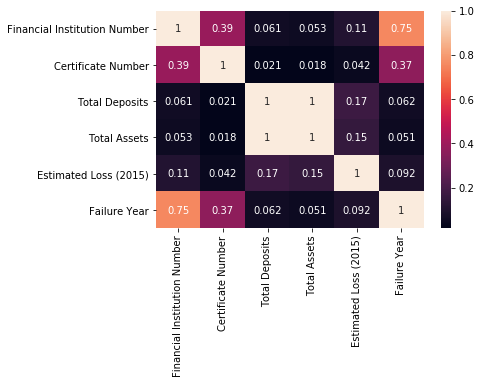

In [66]:
corr = banks[banks.columns].corr()
sns.heatmap(corr, annot = True)

In [67]:
banks.groupby('Failure Year')['Institution Name'].agg('count')

Failure Year
1934      9
1935     25
1936     69
1937     75
1938     74
1939     60
1940     43
1941     15
1942     20
1943      5
1944      2
1945      1
1946      1
1947      5
1948      3
1949      4
1950      4
1951      2
1952      3
1953      2
1954      2
1955      5
1956      2
1957      1
1958      4
1959      3
1960      1
1961      5
1962      1
1963      2
       ... 
1986    161
1987    217
1988    232
1989    530
1990    380
1991    268
1992    178
1993     50
1994     15
1995      8
1996      6
1997      1
1998      3
1999      8
2000      7
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    154
2011     92
2012     51
2013     24
2014     18
2015      7
2016      5
2017      2
Name: Institution Name, Length: 82, dtype: int64

In [68]:
banks.groupby('Charter Type').agg('count')

,Financial Institution Number,Institution Name,Institution Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year,City,State
Charter Type,,,,,,,,,,,,,,
FEDERAL,657,760,760,760,760,760,672,760,760,717,590,760,760,760
FEDERAL/STATE,644,691,691,691,691,691,691,691,691,691,572,691,691,691
STATE,1582,2033,2033,2033,2033,2033,1636,2033,2033,1925,1347,2033,2033,2033


In [69]:
banks.groupby(['Charter Type'])['Estimated Loss (2015)'].agg('mean')

Charter Type
FEDERAL           36381.003390
FEDERAL/STATE    106485.405594
STATE             70432.242762
Name: Estimated Loss (2015), dtype: float64

Text(0,0.5,'Bank Failures')

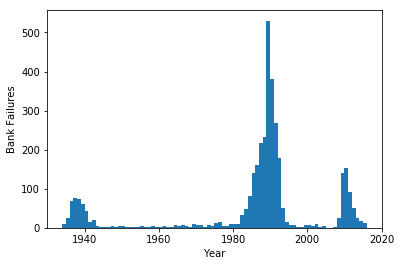

In [70]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

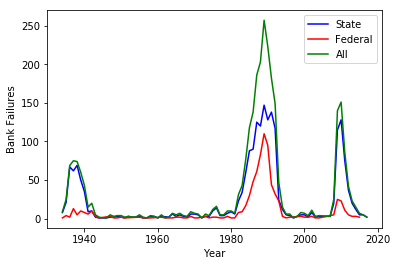

In [71]:
failure_year_type = banks.groupby(['Failure Year', 'Charter Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Charter Type', 'Number of Failures']

failure_year_state = failure_year_type[failure_year_type['Charter Type']=='STATE']
failure_year_federal = failure_year_type[failure_year_type['Charter Type']=='FEDERAL']
failure_year_all = failure_year_type[(failure_year_type['Charter Type']=='STATE') | (failure_year_type['Charter Type']=='FEDERAL')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_state['Failure Year'], failure_year_state['Number of Failures'], 'b-')
plt.plot(failure_year_federal['Failure Year'], failure_year_federal['Number of Failures'], 'r-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g-')


plt.xlabel('Year')
plt.ylabel('Bank Failures')
plt.legend(['State', 'Federal', 'All'])



In [72]:
banks['Failure Date'].unique()

array(['4/19/1934 ', '5/28/1934 ', '7/18/1934 ', ..., '9/23/2016 ',
       '1/13/2017 ', '1/27/2017 '], dtype=object)

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


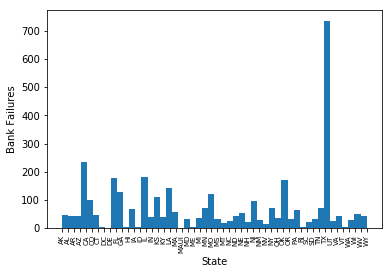

In [73]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count')
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

In [84]:
banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('sum')

,State,Estimated Loss (2015)
0,AK,471559.0
1,AL,4606439.0
2,AR,3269028.0
3,AZ,5734352.0
4,CA,26625092.0
5,CO,4229034.0
6,CT,2631253.0
7,DC,308748.0
8,DE,249.0
9,FL,16861759.0


In [85]:
banks_by_state = banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('count')
banks_by_state.sort_values(by='Estimated Loss (2015)', ascending=False).iloc[0:5]


,State,Estimated Loss (2015)
44,TX,647
4,CA,191
9,FL,158
14,IL,125
18,LA,121
